In [1]:
import os
from pandas import *
from numpy import *
from H_utility import *

currentdir='/home/adun6414/Work/CERC_UCM'
os.chdir(currentdir)
os.chdir('/home/adun6414/Work/CERC_UCM/Fig_n_data')
filename='DATA8to8.csv' #filename='DATA8to9.csv'
DATA=read_csv(filename).set_index('Date')
DATA.index=H_num2date(H_date2num(DATA.index))

Text(0, 0.5, 'range temp [$^oF$]')

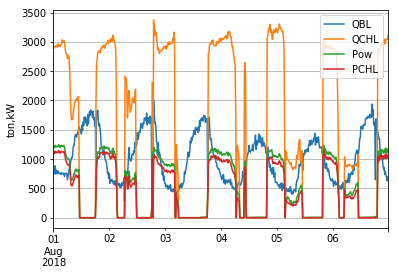

<Figure size 432x288 with 0 Axes>

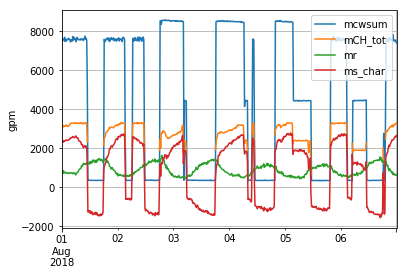

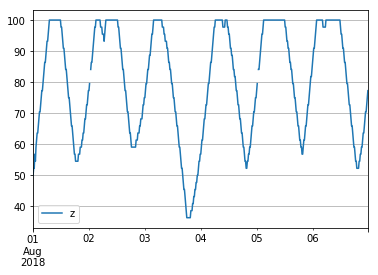

<Figure size 432x288 with 0 Axes>

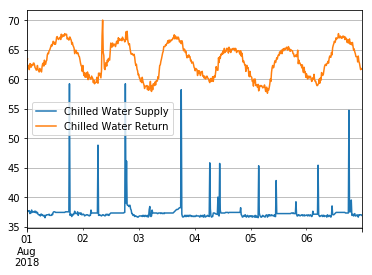

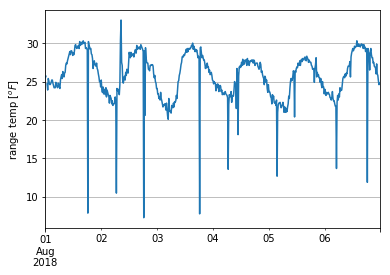

In [2]:
QBL=DATA['QBL'].fillna(method='ffill')
QCHL=DATA['QCHLsum'].fillna(value=0)
Twb=DATA['Twb'].fillna(method='ffill')
PCHL=DATA[['PCHsum']]
PCT=DATA[['PCTtot']]
Pow=DATA[['PCHsum','PCTtot']].sum(axis=1)
TCHWS=DATA['Chilled Water Supply'].apply(f2c)
TCHWR=DATA['Chilled Water Return'].apply(f2c)

figure(1)
ax=subplot(111)
QBL.apply(kW2ton).plot(grid=True ,ax=ax)
QCHL.apply(kW2ton).plot(grid=True ,ax=ax)
Pow.plot(grid=True,ax=ax)
PCHL.plot(grid=True,ax=ax)
legend(['QBL','QCHL','Pow','PCHL'])
ylabel('ton,kW')
figure(2)
DATA[['mcwsum','mCH_tot','mr','ms_char']].apply(kgs2gpm).plot(grid=True)
ylabel('gpm')
figure(3)
DATA[['z']].plot(grid=True)

figure()
DATA[['Chilled Water Supply','Chilled Water Return']].plot(grid=True)

figure()
DT=TCHWR.apply(c2f)-TCHWS.apply(c2f)
DT.plot(grid=True)
ylabel('range temp [$^oF$]')


Text(0.5, 1.0, 'histogram of Chiller COP')

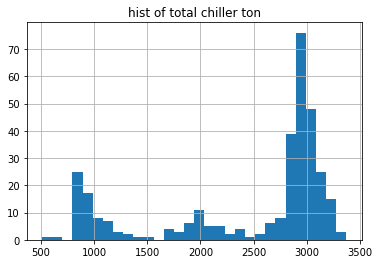

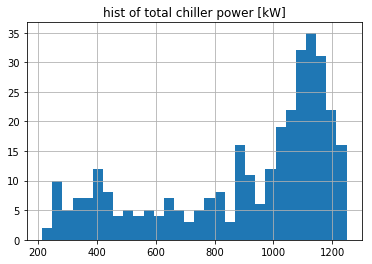

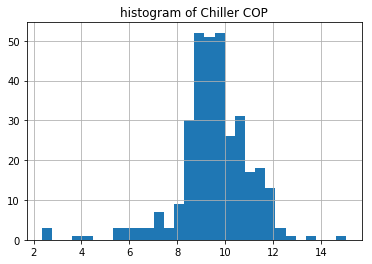

In [3]:
figure()
QCHL[QCHL>ton2kW(500)].apply(kW2ton).hist(bins=30)
title('hist of total chiller ton')

figure()
Pow[Pow>100].hist(bins=30)
title('hist of total chiller power [kW]')


COP=QCHL/Pow
figure()
COP[COP>2].hist(bins=30)
title('histogram of Chiller COP')

Text(0, 0.5, 'return water [gpm]')

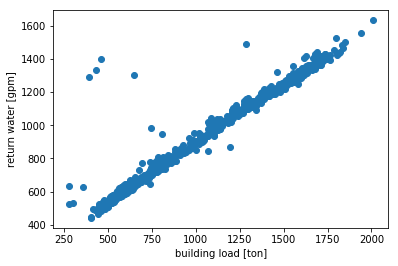

In [4]:
plot(QBL.apply(kW2ton).to_numpy(),DATA['mr'].apply(kgs2gpm).to_numpy(),'o')
xlabel('building load [ton]')
ylabel('return water [gpm]')

'/home/adun6414/Work/CERC_UCM/Fig_n_data'

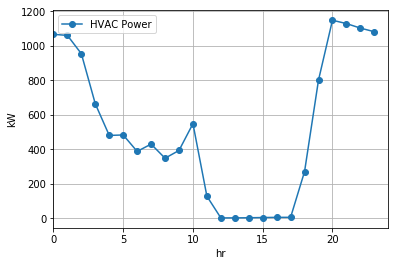

In [5]:
try:
    Pow=Pow.to_frame()
except:
    Pow=Pow
Pow.index=H_num2date(H_date2num(Pow.index))
H_rplot(Pow,8)
grid(True)
xlim([0,24])
ylabel('kW')
legend(['HVAC Power'])
savefig('Pow_Aug_represen.png')
os.getcwd()